## Load data from: https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/air_quality_no2_long.csv

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/air_quality_no2_long.csv')

In [4]:
df.head()

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       2068 non-null   object 
 1   country    2068 non-null   object 
 2   date.utc   2068 non-null   object 
 3   location   2068 non-null   object 
 4   parameter  2068 non-null   object 
 5   value      2068 non-null   float64
 6   unit       2068 non-null   object 
dtypes: float64(1), object(6)
memory usage: 113.2+ KB


## What are the cities and locations?

In [16]:
df.groupby(['city', 'location']).size()

city       location          
Antwerpen  BETR801                 95
London     London Westminster     969
Paris      FR04014               1004
dtype: int64

## Check if there exists a datetime column.

In [14]:
df['date.utc'] = pd.to_datetime(df['date.utc'])
df = df.rename({'date.utc': 'date'}, axis=1)

## Check maximal and minimum date for each location

In [19]:
df.groupby('city').max()['date'], df.groupby('city').min()['date']

(city
 Antwerpen   2019-06-17 08:00:00+00:00
 London      2019-06-17 11:00:00+00:00
 Paris       2019-06-21 00:00:00+00:00
 Name: date, dtype: datetime64[ns, UTC],
 city
 Antwerpen   2019-05-07 01:00:00+00:00
 London      2019-05-07 01:00:00+00:00
 Paris       2019-05-07 01:00:00+00:00
 Name: date, dtype: datetime64[ns, UTC])

## Check date range for each city

In [21]:
timedelta = df.groupby('city').max()['date'] - df.groupby('city').min()['date']

In [33]:
timedelta.dt.days

city
Antwerpen    41
London       41
Paris        44
Name: date, dtype: int64

## How to extract month from datetime?

In [35]:
df['month'] = df['date'].dt.month

In [36]:
df

,city,country,date,location,parameter,value,unit,month
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,6
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,6
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,6
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,6
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,6
...,...,...,...,...,...,...,...,...
2063,London,GB,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,µg/m³,5
2064,London,GB,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,µg/m³,5
2065,London,GB,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,µg/m³,5
2066,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³,5


## What is the average $NO_2$ concentration for each day of the week for each of the measurement locations?

In [37]:
df['day_of_week'] = df['date'].dt.dayofweek

In [78]:
df_groupby = df.groupby(['day_of_week', 'city']).mean()

<AxesSubplot:xlabel='day_of_week'>

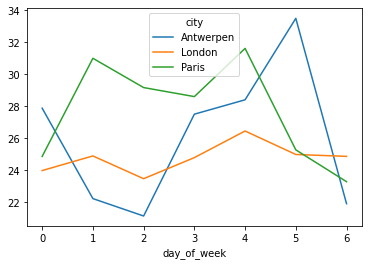

In [145]:
df_groupby.reset_index().pivot(index='day_of_week', columns='city', values='value').plot()

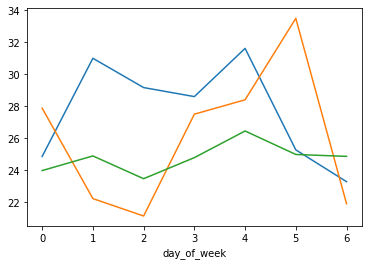

In [77]:
for city in df['city'].unique():
#     print(df_groupby[df_groupby['city'] == city])
    df_groupby[df_groupby['city'] == city].set_index('day_of_week')['value'].plot()

## Plot the typical $𝑁𝑂_2$ pattern during the day of our time series of all stations together. In other words, what is the average value for each hour of the day?

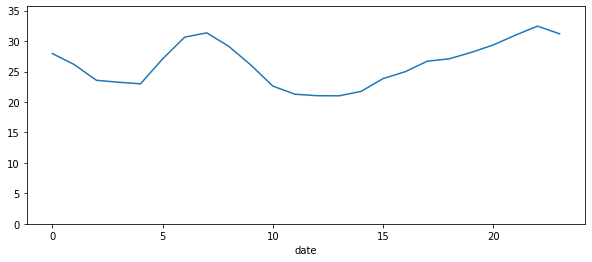

In [91]:
hour_df = df.groupby(df['date'].dt.hour).mean()['value']
hour_df.plot(figsize=(10, 4), ylim=[0, max(hour_df)*1.1]);

## Create a plot of the $𝑁𝑂_2$ values in the different stations from the 20th of May till the end of 21st of May

In [ ]:
df = df.set_index('date')

In [101]:
df = df.sort_index()

In [102]:
df['2019-05-20':'2019-05-21']

,city,country,location,parameter,value,unit,month,day_of_week
date,,,,,,,,
2019-05-20 00:00:00+00:00,Paris,FR,FR04014,no2,16.4,µg/m³,5,0
2019-05-20 00:00:00+00:00,London,GB,London Westminster,no2,28.0,µg/m³,5,0
2019-05-20 00:00:00+00:00,Antwerpen,BE,BETR801,no2,26.0,µg/m³,5,0
2019-05-20 01:00:00+00:00,London,GB,London Westminster,no2,28.0,µg/m³,5,0
2019-05-20 01:00:00+00:00,Paris,FR,FR04014,no2,12.8,µg/m³,5,0
...,...,...,...,...,...,...,...,...
2019-05-21 21:00:00+00:00,Paris,FR,FR04014,no2,43.0,µg/m³,5,1
2019-05-21 22:00:00+00:00,London,GB,London Westminster,no2,33.0,µg/m³,5,1
2019-05-21 22:00:00+00:00,Paris,FR,FR04014,no2,33.2,µg/m³,5,1


In [113]:
df['city'].unique()

array(['London', 'Antwerpen', 'Paris'], dtype=object)

<AxesSubplot:xlabel='date'>

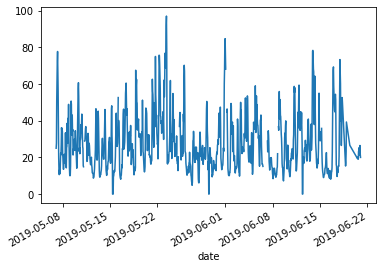

In [124]:
pivot_table[city].plot()

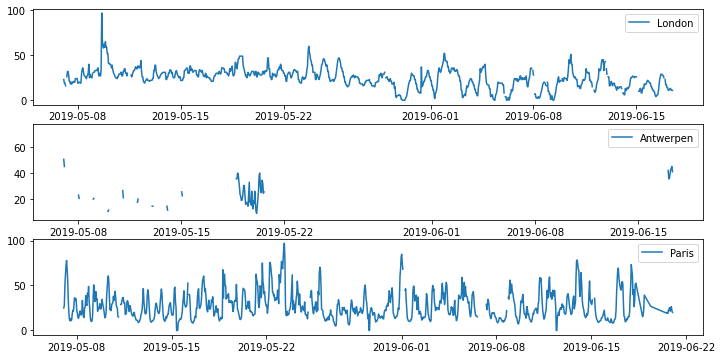

In [132]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12,6))
pivot_table = df.pivot(columns='city', values='value')
for i, city in enumerate(df['city'].unique()):
    ax[i].plot(pivot_table[city].index, pivot_table[city].values, label=city)
    ax[i].legend()


## Aggregate the current hourly time series values to the weekly maximum value in each of the stations.

In [139]:
city_weekly = df.groupby('city').resample('W')['value'].max()

In [146]:
city_weekly

city       date                     
Antwerpen  2019-05-12 00:00:00+00:00    50.5
           2019-05-19 00:00:00+00:00    41.5
           2019-05-26 00:00:00+00:00    74.5
           2019-06-02 00:00:00+00:00    52.5
           2019-06-09 00:00:00+00:00    15.0
           2019-06-16 00:00:00+00:00    42.5
           2019-06-23 00:00:00+00:00    45.0
London     2019-05-12 00:00:00+00:00    97.0
           2019-05-19 00:00:00+00:00    49.0
           2019-05-26 00:00:00+00:00    60.0
           2019-06-02 00:00:00+00:00    52.0
           2019-06-09 00:00:00+00:00    40.0
           2019-06-16 00:00:00+00:00    51.0
           2019-06-23 00:00:00+00:00    17.0
Paris      2019-05-12 00:00:00+00:00    77.7
           2019-05-19 00:00:00+00:00    67.5
           2019-05-26 00:00:00+00:00    97.0
           2019-06-02 00:00:00+00:00    84.7
           2019-06-09 00:00:00+00:00    59.0
           2019-06-16 00:00:00+00:00    78.3
           2019-06-23 00:00:00+00:00    73.3
Name: value, dtype

In [147]:
city_weekly.reset_index().pivot(index='date', columns='city', values='value')

city,Antwerpen,London,Paris
date,,,
2019-05-12 00:00:00+00:00,50.5,97.0,77.7
2019-05-19 00:00:00+00:00,41.5,49.0,67.5
2019-05-26 00:00:00+00:00,74.5,60.0,97.0
2019-06-02 00:00:00+00:00,52.5,52.0,84.7
2019-06-09 00:00:00+00:00,15.0,40.0,59.0
2019-06-16 00:00:00+00:00,42.5,51.0,78.3
2019-06-23 00:00:00+00:00,45.0,17.0,73.3


<AxesSubplot:xlabel='date'>

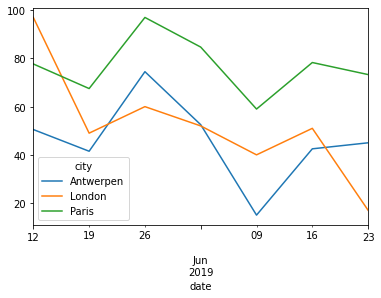

In [142]:
city_weekly.reset_index().pivot(index='date', columns='city', values='value').plot()

## Make a plot of the daily mean $𝑁𝑂_2$ value in each of the stations.

In [154]:
df_pivot = df.pivot(columns='city', values='value')

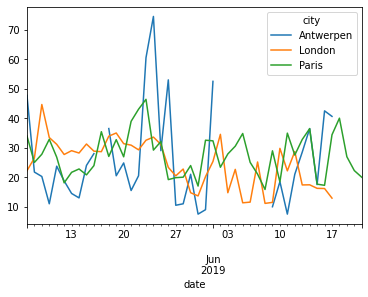

In [158]:
df_pivot.resample('D').mean().plot();